## Workload detection algorithm

Neural network that takes as input the image of the screen and predicts the type of workload from the following categories.
* browsing
* coding
* idle
* office
* entertainment


In [60]:
# import libraries
import tensorflow as tf
import matplotlib.pyplot as plt

# paths
train_dir = 'train'
test_dir = 'test'

In [61]:
# Load data
BATCH_SIZE=32
IMG_SIZE= (160,160)

train_set = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)
test_set = tf.keras.utils.image_dataset_from_directory(test_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)


Found 62 files belonging to 4 classes.
Found 1 files belonging to 4 classes.


In [62]:
train_set.class_names

['browsing', 'coding', 'idle', 'office']

2022-07-11 23:44:36.722380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


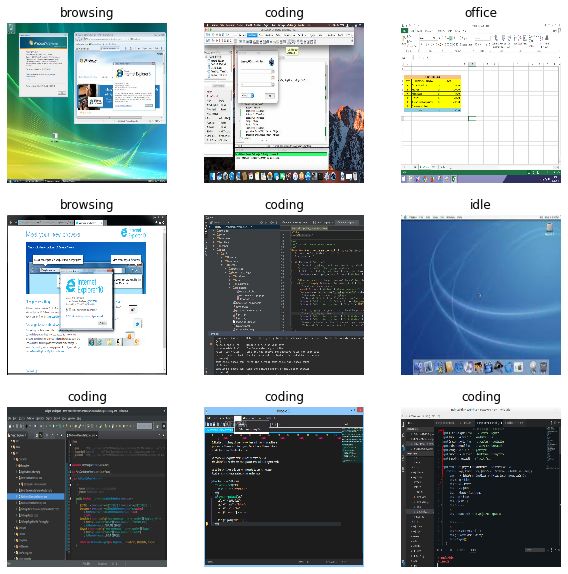

In [63]:
class_names = train_set.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

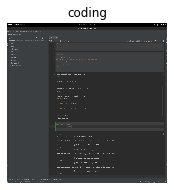

In [64]:
plt.figure(figsize=(10, 10))
for images, labels in test_set.take(1):
    for i in range(1):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [65]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

In [66]:
# rescaling
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)


In [67]:
# base model
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
base_model.summary()


Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_8[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [68]:
# pooling & classification
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(len(train_set.class_names))


In [69]:
# full model
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)



In [70]:
# compile model
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_4 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_3 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_3 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

In [71]:
history = model.fit(train_set,
                    epochs=100)


Epoch 1/100


2022-07-11 23:44:39.315256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 2s 37ms/step - loss: 1.8224 - accuracy: 0.3065
Epoch 2/100


2022-07-11 23:44:39.680233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 54ms/step - loss: 1.9475 - accuracy: 0.2581
Epoch 3/100
2/2 [==============================] - 0s 54ms/step - loss: 1.8709 - accuracy: 0.2258
Epoch 4/100


2022-07-11 23:44:39.979594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:40.170202: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 53ms/step - loss: 1.6111 - accuracy: 0.3065
Epoch 5/100
2/2 [==============================] - 0s 56ms/step - loss: 1.6928 - accuracy: 0.3387
Epoch 6/100


2022-07-11 23:44:40.362601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 51ms/step - loss: 1.6160 - accuracy: 0.2419
Epoch 7/100


2022-07-11 23:44:40.586680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 64ms/step - loss: 1.6052 - accuracy: 0.3548
Epoch 8/100


2022-07-11 23:44:40.794532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 55ms/step - loss: 1.5244 - accuracy: 0.3387
Epoch 9/100


2022-07-11 23:44:41.000840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 61ms/step - loss: 1.5602 - accuracy: 0.4194
Epoch 10/100


2022-07-11 23:44:41.231820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 56ms/step - loss: 1.5154 - accuracy: 0.3548
Epoch 11/100


2022-07-11 23:44:41.482345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 56ms/step - loss: 1.6324 - accuracy: 0.2903
Epoch 12/100


2022-07-11 23:44:41.715070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 58ms/step - loss: 1.5493 - accuracy: 0.3548
Epoch 13/100


2022-07-11 23:44:41.927819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 37ms/step - loss: 1.4930 - accuracy: 0.3226
Epoch 14/100


2022-07-11 23:44:42.144727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:42.326391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 38ms/step - loss: 1.6124 - accuracy: 0.2742
Epoch 15/100
2/2 [==============================] - 0s 39ms/step - loss: 1.4362 - accuracy: 0.3387
Epoch 16/100


2022-07-11 23:44:42.518249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 53ms/step - loss: 1.4278 - accuracy: 0.4032
Epoch 17/100


2022-07-11 23:44:42.728778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 62ms/step - loss: 1.3612 - accuracy: 0.4032
Epoch 18/100


2022-07-11 23:44:42.972095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 56ms/step - loss: 1.3101 - accuracy: 0.4677
Epoch 19/100


2022-07-11 23:44:43.211519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 64ms/step - loss: 1.4201 - accuracy: 0.4032
Epoch 20/100


2022-07-11 23:44:43.447506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:43.644495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 56ms/step - loss: 1.2938 - accuracy: 0.4194
Epoch 21/100
2/2 [==============================] - 0s 57ms/step - loss: 1.3078 - accuracy: 0.4839
Epoch 22/100


2022-07-11 23:44:43.842264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 53ms/step - loss: 1.4264 - accuracy: 0.4677
Epoch 23/100


2022-07-11 23:44:44.083632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:44.267551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 49ms/step - loss: 1.2991 - accuracy: 0.4839
Epoch 24/100
2/2 [==============================] - 0s 53ms/step - loss: 1.2471 - accuracy: 0.4839
Epoch 25/100


2022-07-11 23:44:44.476934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:44.673473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 34ms/step - loss: 1.3201 - accuracy: 0.4194
Epoch 26/100
2/2 [==============================] - 0s 62ms/step - loss: 1.0386 - accuracy: 0.5645
Epoch 27/100


2022-07-11 23:44:44.871444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 52ms/step - loss: 1.1791 - accuracy: 0.5161
Epoch 28/100


2022-07-11 23:44:45.130617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 36ms/step - loss: 1.1939 - accuracy: 0.5000
Epoch 29/100


2022-07-11 23:44:45.371517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:45.565794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 50ms/step - loss: 1.0708 - accuracy: 0.4355
Epoch 30/100
2/2 [==============================] - 0s 49ms/step - loss: 1.1872 - accuracy: 0.5161
Epoch 31/100


2022-07-11 23:44:45.759468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:45.938549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 40ms/step - loss: 1.0888 - accuracy: 0.5806
Epoch 32/100
2/2 [==============================] - 0s 47ms/step - loss: 1.1881 - accuracy: 0.4839
Epoch 33/100


2022-07-11 23:44:46.126490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 58ms/step - loss: 1.0808 - accuracy: 0.6129
Epoch 34/100


2022-07-11 23:44:46.352574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:46.557176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 54ms/step - loss: 1.0337 - accuracy: 0.5968
Epoch 35/100
2/2 [==============================] - 0s 57ms/step - loss: 1.1818 - accuracy: 0.4677
Epoch 36/100


2022-07-11 23:44:46.755880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 50ms/step - loss: 0.9851 - accuracy: 0.5968
Epoch 37/100


2022-07-11 23:44:46.980787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:47.180321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 35ms/step - loss: 0.8866 - accuracy: 0.6290
Epoch 38/100
2/2 [==============================] - 0s 39ms/step - loss: 0.9928 - accuracy: 0.6290
Epoch 39/100


2022-07-11 23:44:47.411715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:47.594630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 37ms/step - loss: 1.0906 - accuracy: 0.5161
Epoch 40/100
2/2 [==============================] - 0s 42ms/step - loss: 0.9311 - accuracy: 0.6935
Epoch 41/100


2022-07-11 23:44:47.780521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:47.964501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 53ms/step - loss: 0.8370 - accuracy: 0.6774
Epoch 42/100
2/2 [==============================] - 0s 57ms/step - loss: 0.8916 - accuracy: 0.5968
Epoch 43/100


2022-07-11 23:44:48.165229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 61ms/step - loss: 0.9133 - accuracy: 0.6452
Epoch 44/100


2022-07-11 23:44:48.413087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 57ms/step - loss: 0.9532 - accuracy: 0.6129
Epoch 45/100


2022-07-11 23:44:48.643201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 64ms/step - loss: 1.0578 - accuracy: 0.6129
Epoch 46/100


2022-07-11 23:44:48.888408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 58ms/step - loss: 0.8361 - accuracy: 0.6935
Epoch 47/100


2022-07-11 23:44:49.130029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:49.330178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 45ms/step - loss: 0.8596 - accuracy: 0.6290
Epoch 48/100
2/2 [==============================] - 0s 59ms/step - loss: 0.8057 - accuracy: 0.7097
Epoch 49/100


2022-07-11 23:44:49.552220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 49ms/step - loss: 0.9259 - accuracy: 0.6452
Epoch 50/100


2022-07-11 23:44:49.802949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 53ms/step - loss: 0.8886 - accuracy: 0.5968
Epoch 51/100


2022-07-11 23:44:50.018994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 47ms/step - loss: 0.8972 - accuracy: 0.6290
Epoch 52/100


2022-07-11 23:44:50.227412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 64ms/step - loss: 0.9354 - accuracy: 0.5968
Epoch 53/100


2022-07-11 23:44:50.448883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 59ms/step - loss: 0.8886 - accuracy: 0.6290
Epoch 54/100


2022-07-11 23:44:50.683102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 65ms/step - loss: 0.8707 - accuracy: 0.7097
Epoch 55/100


2022-07-11 23:44:50.899652: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 53ms/step - loss: 0.7548 - accuracy: 0.7258
Epoch 56/100


2022-07-11 23:44:51.110236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:51.305685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 53ms/step - loss: 0.8778 - accuracy: 0.6452
Epoch 57/100
2/2 [==============================] - 0s 53ms/step - loss: 0.8593 - accuracy: 0.6290
Epoch 58/100


2022-07-11 23:44:51.516363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 49ms/step - loss: 0.8371 - accuracy: 0.6613
Epoch 59/100


2022-07-11 23:44:51.751263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 54ms/step - loss: 0.8192 - accuracy: 0.6613
Epoch 60/100


2022-07-11 23:44:51.973985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:52.163454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 57ms/step - loss: 0.8058 - accuracy: 0.6774
Epoch 61/100
2/2 [==============================] - 0s 35ms/step - loss: 0.8486 - accuracy: 0.6129
Epoch 62/100


2022-07-11 23:44:52.420093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:52.615350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 52ms/step - loss: 0.8243 - accuracy: 0.6290
Epoch 63/100
2/2 [==============================] - 0s 40ms/step - loss: 0.7412 - accuracy: 0.6935
Epoch 64/100


2022-07-11 23:44:52.809065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:53.005964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 35ms/step - loss: 0.8098 - accuracy: 0.6935
Epoch 65/100
2/2 [==============================] - 0s 37ms/step - loss: 0.8210 - accuracy: 0.6613
Epoch 66/100


2022-07-11 23:44:53.189523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:53.385403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 36ms/step - loss: 0.6854 - accuracy: 0.7581
Epoch 67/100
2/2 [==============================] - 0s 56ms/step - loss: 0.7145 - accuracy: 0.7903
Epoch 68/100


2022-07-11 23:44:53.592081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 64ms/step - loss: 0.6447 - accuracy: 0.7258
Epoch 69/100


2022-07-11 23:44:53.823678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 61ms/step - loss: 0.7995 - accuracy: 0.7097
Epoch 70/100


2022-07-11 23:44:54.049672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 54ms/step - loss: 0.6824 - accuracy: 0.7419
Epoch 71/100


2022-07-11 23:44:54.269126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 59ms/step - loss: 0.6596 - accuracy: 0.7258
Epoch 72/100


2022-07-11 23:44:54.489136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 53ms/step - loss: 0.6712 - accuracy: 0.7419
Epoch 73/100


2022-07-11 23:44:54.699175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 57ms/step - loss: 0.7170 - accuracy: 0.7097
Epoch 74/100


2022-07-11 23:44:54.924496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 62ms/step - loss: 0.7119 - accuracy: 0.7419
Epoch 75/100


2022-07-11 23:44:55.141134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 50ms/step - loss: 0.7207 - accuracy: 0.7419
Epoch 76/100


2022-07-11 23:44:55.399189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 55ms/step - loss: 0.6521 - accuracy: 0.7581
Epoch 77/100


2022-07-11 23:44:55.618566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 64ms/step - loss: 0.7775 - accuracy: 0.6935
Epoch 78/100


2022-07-11 23:44:55.830299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 53ms/step - loss: 0.6641 - accuracy: 0.8065
Epoch 79/100


2022-07-11 23:44:56.099562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 47ms/step - loss: 0.6525 - accuracy: 0.7419
Epoch 80/100


2022-07-11 23:44:56.317771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 56ms/step - loss: 0.7156 - accuracy: 0.6613
Epoch 81/100


2022-07-11 23:44:56.531065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - ETA: 0s - loss: 0.7746 - accuracy: 0.7581

2022-07-11 23:44:56.745409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 103ms/step - loss: 0.7746 - accuracy: 0.7581
Epoch 82/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6420 - accuracy: 0.8125

2022-07-11 23:44:56.986691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 50ms/step - loss: 0.6898 - accuracy: 0.7903
Epoch 83/100
2/2 [==============================] - 0s 58ms/step - loss: 0.6156 - accuracy: 0.8226
Epoch 84/100


2022-07-11 23:44:57.260135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 48ms/step - loss: 0.6472 - accuracy: 0.7419
Epoch 85/100


2022-07-11 23:44:57.472604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 37ms/step - loss: 0.6730 - accuracy: 0.7742
Epoch 86/100


2022-07-11 23:44:57.714977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 52ms/step - loss: 0.6336 - accuracy: 0.7742
Epoch 87/100


2022-07-11 23:44:57.921341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 49ms/step - loss: 0.6240 - accuracy: 0.7742
Epoch 88/100


2022-07-11 23:44:58.166559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:58.363227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 64ms/step - loss: 0.5337 - accuracy: 0.7903
Epoch 89/100
2/2 [==============================] - 0s 38ms/step - loss: 0.5545 - accuracy: 0.8226
Epoch 90/100


2022-07-11 23:44:58.563860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:44:58.744720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 37ms/step - loss: 0.6576 - accuracy: 0.7097
Epoch 91/100
2/2 [==============================] - 0s 52ms/step - loss: 0.5174 - accuracy: 0.8226
Epoch 92/100


2022-07-11 23:44:58.928857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 61ms/step - loss: 0.6842 - accuracy: 0.7581
Epoch 93/100


2022-07-11 23:44:59.182288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 54ms/step - loss: 0.6037 - accuracy: 0.7742
Epoch 94/100


2022-07-11 23:44:59.396289: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 63ms/step - loss: 0.6095 - accuracy: 0.7581
Epoch 95/100


2022-07-11 23:44:59.620574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 57ms/step - loss: 0.6495 - accuracy: 0.7742
Epoch 96/100


2022-07-11 23:44:59.825340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 56ms/step - loss: 0.6145 - accuracy: 0.7581
Epoch 97/100


2022-07-11 23:45:00.049253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-11 23:45:00.242826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 47ms/step - loss: 0.5358 - accuracy: 0.8065
Epoch 98/100
2/2 [==============================] - 0s 53ms/step - loss: 0.5230 - accuracy: 0.8387
Epoch 99/100


2022-07-11 23:45:00.489776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 56ms/step - loss: 0.5905 - accuracy: 0.8387
Epoch 100/100


2022-07-11 23:45:00.733511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/2 [==============================] - 0s 59ms/step - loss: 0.5404 - accuracy: 0.8065


2022-07-11 23:45:00.941611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [72]:
model.evaluate(test_set)

1/1 [==============================] - 0s 417ms/step - loss: 0.0827 - accuracy: 1.0000


[0.08274682611227036, 1.0]

In [73]:
model.predict(test_set.take(1))

1/1 [==============================] - 0s 398ms/step


array([[-2.3355453,  1.4440858, -1.5576905, -2.843576 ]], dtype=float32)